# MULTIPLE LINEAR REGRESSION
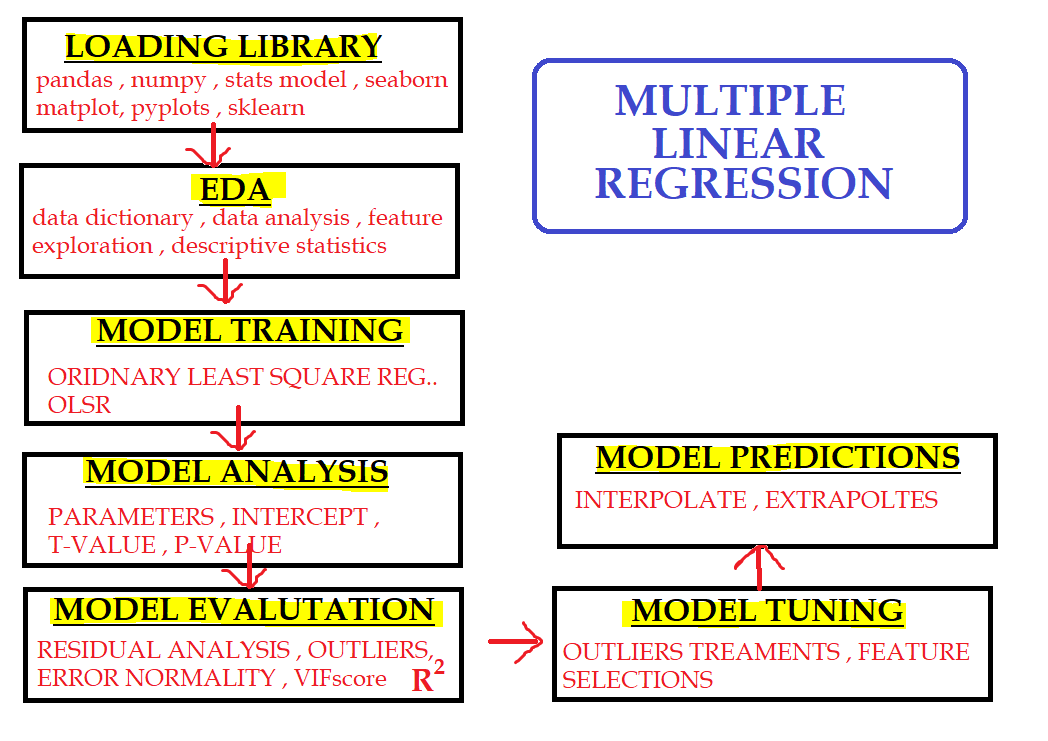

# CASE STUDY 1 : Price prediction model for Toyota Corolla

In [116]:
#LOADING LIBRARIES 1 (DATA LOADING , EDA , ANALYSIS)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
#LOADING LIBRARIES 2 (STATISTICAL LIBRARIES)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [119]:
#LOADING DATA SET
cars=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

EDA
------------
- DESCRIPTIVE STATS
- FEATURE EXPLORATION
- CORRELATION ANALYSIS
- NORMALITY TEST
- SCALING

In [120]:
#DATA OVERVIEW
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [121]:
print('total features = ', len(cars.columns))
cars.columns

total features =  38


Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

FEATURES EXPLORATION
--------------
- INDEPENDENT VARIABLE -
      'Id', 'Model','Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
      'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
      'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
      'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
      'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
      'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
      'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
      'Radio_cassette', 'Tow_Bar'

- TARGET VARIABLE -  'Price'

In [122]:
#DATA SET EXPLOARTION
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [123]:
#FEATURE SLECTIONS and droping dummies
#DROPPING MODEL ID AND STRING DATA TYPE (MODEL)
cars1=pd.concat([cars.iloc[:,2:4],cars.iloc[:,6:7],cars.iloc[:,8:9],cars.iloc[:,12:14],cars.iloc[:,15:18]],axis=1)


In [124]:
cars1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [125]:
#renaming
cars2=cars1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)

In [126]:
cars2.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [127]:
cars2.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

FEATURES SELECTIONS
--------------
- INDEPENDENT VARIABLE -
      'Age', 'KM', 'HP', 'CC',
      'Doors', 'Gears', 'QT',
      'Weight'

- TARGET VARIABLE -  'Price'

In [128]:
#CHECK FOR NULL AND DUPLICATES
cars2[cars2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [129]:
#DROPPING DUPILCATES
cars3=cars2.drop_duplicates().reset_index(drop=True)

In [130]:
#STATISTICAL ANLAYSIS
cars3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


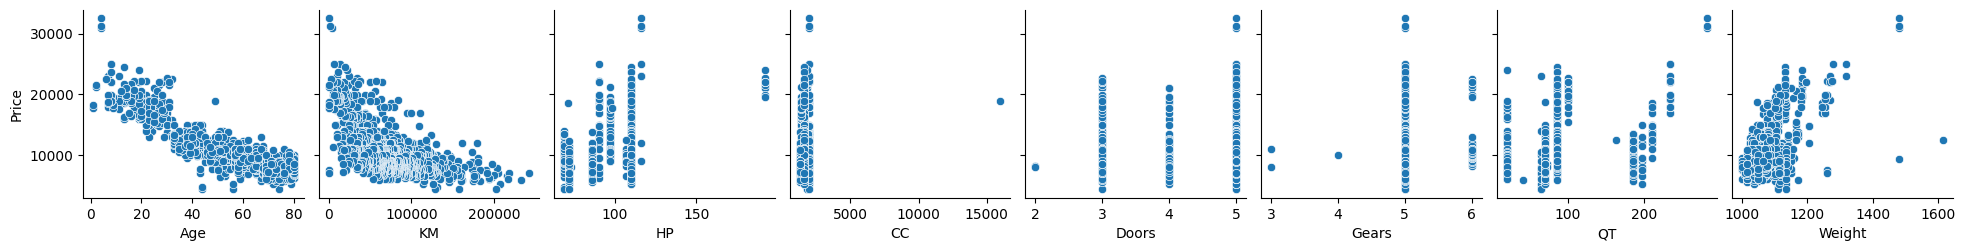

In [131]:
#CORREALTION ANALYSIS BETWEEN TARGET AND INDEPENDENT VARIABLE
sns.pairplot(x_vars=['Age', 'KM', 'HP', 'CC',
'Doors', 'Gears', 'QT',
'Weight'],y_vars=['Price'],data=cars3)

<Axes: >

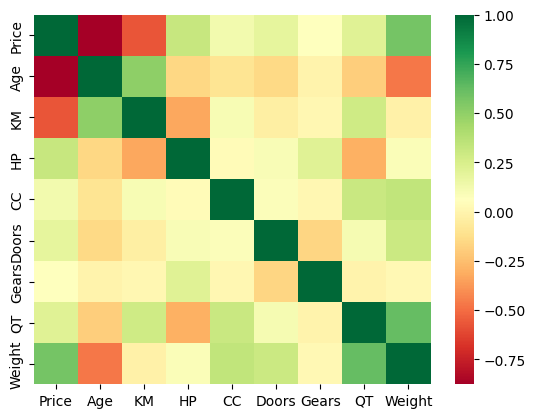

In [132]:
#DRAWING HEATMAP FOR CORRELATION
sns.heatmap(cars3.corr(),cmap='RdYlGn')

In [133]:
#CORRELATION between PRICE and independent variables
cars3.corr()['Price'][1:]

Age      -0.876273
KM       -0.569420
HP        0.314134
CC        0.124375
Doors     0.183604
Gears     0.063831
QT        0.211508
Weight    0.575869
Name: Price, dtype: float64

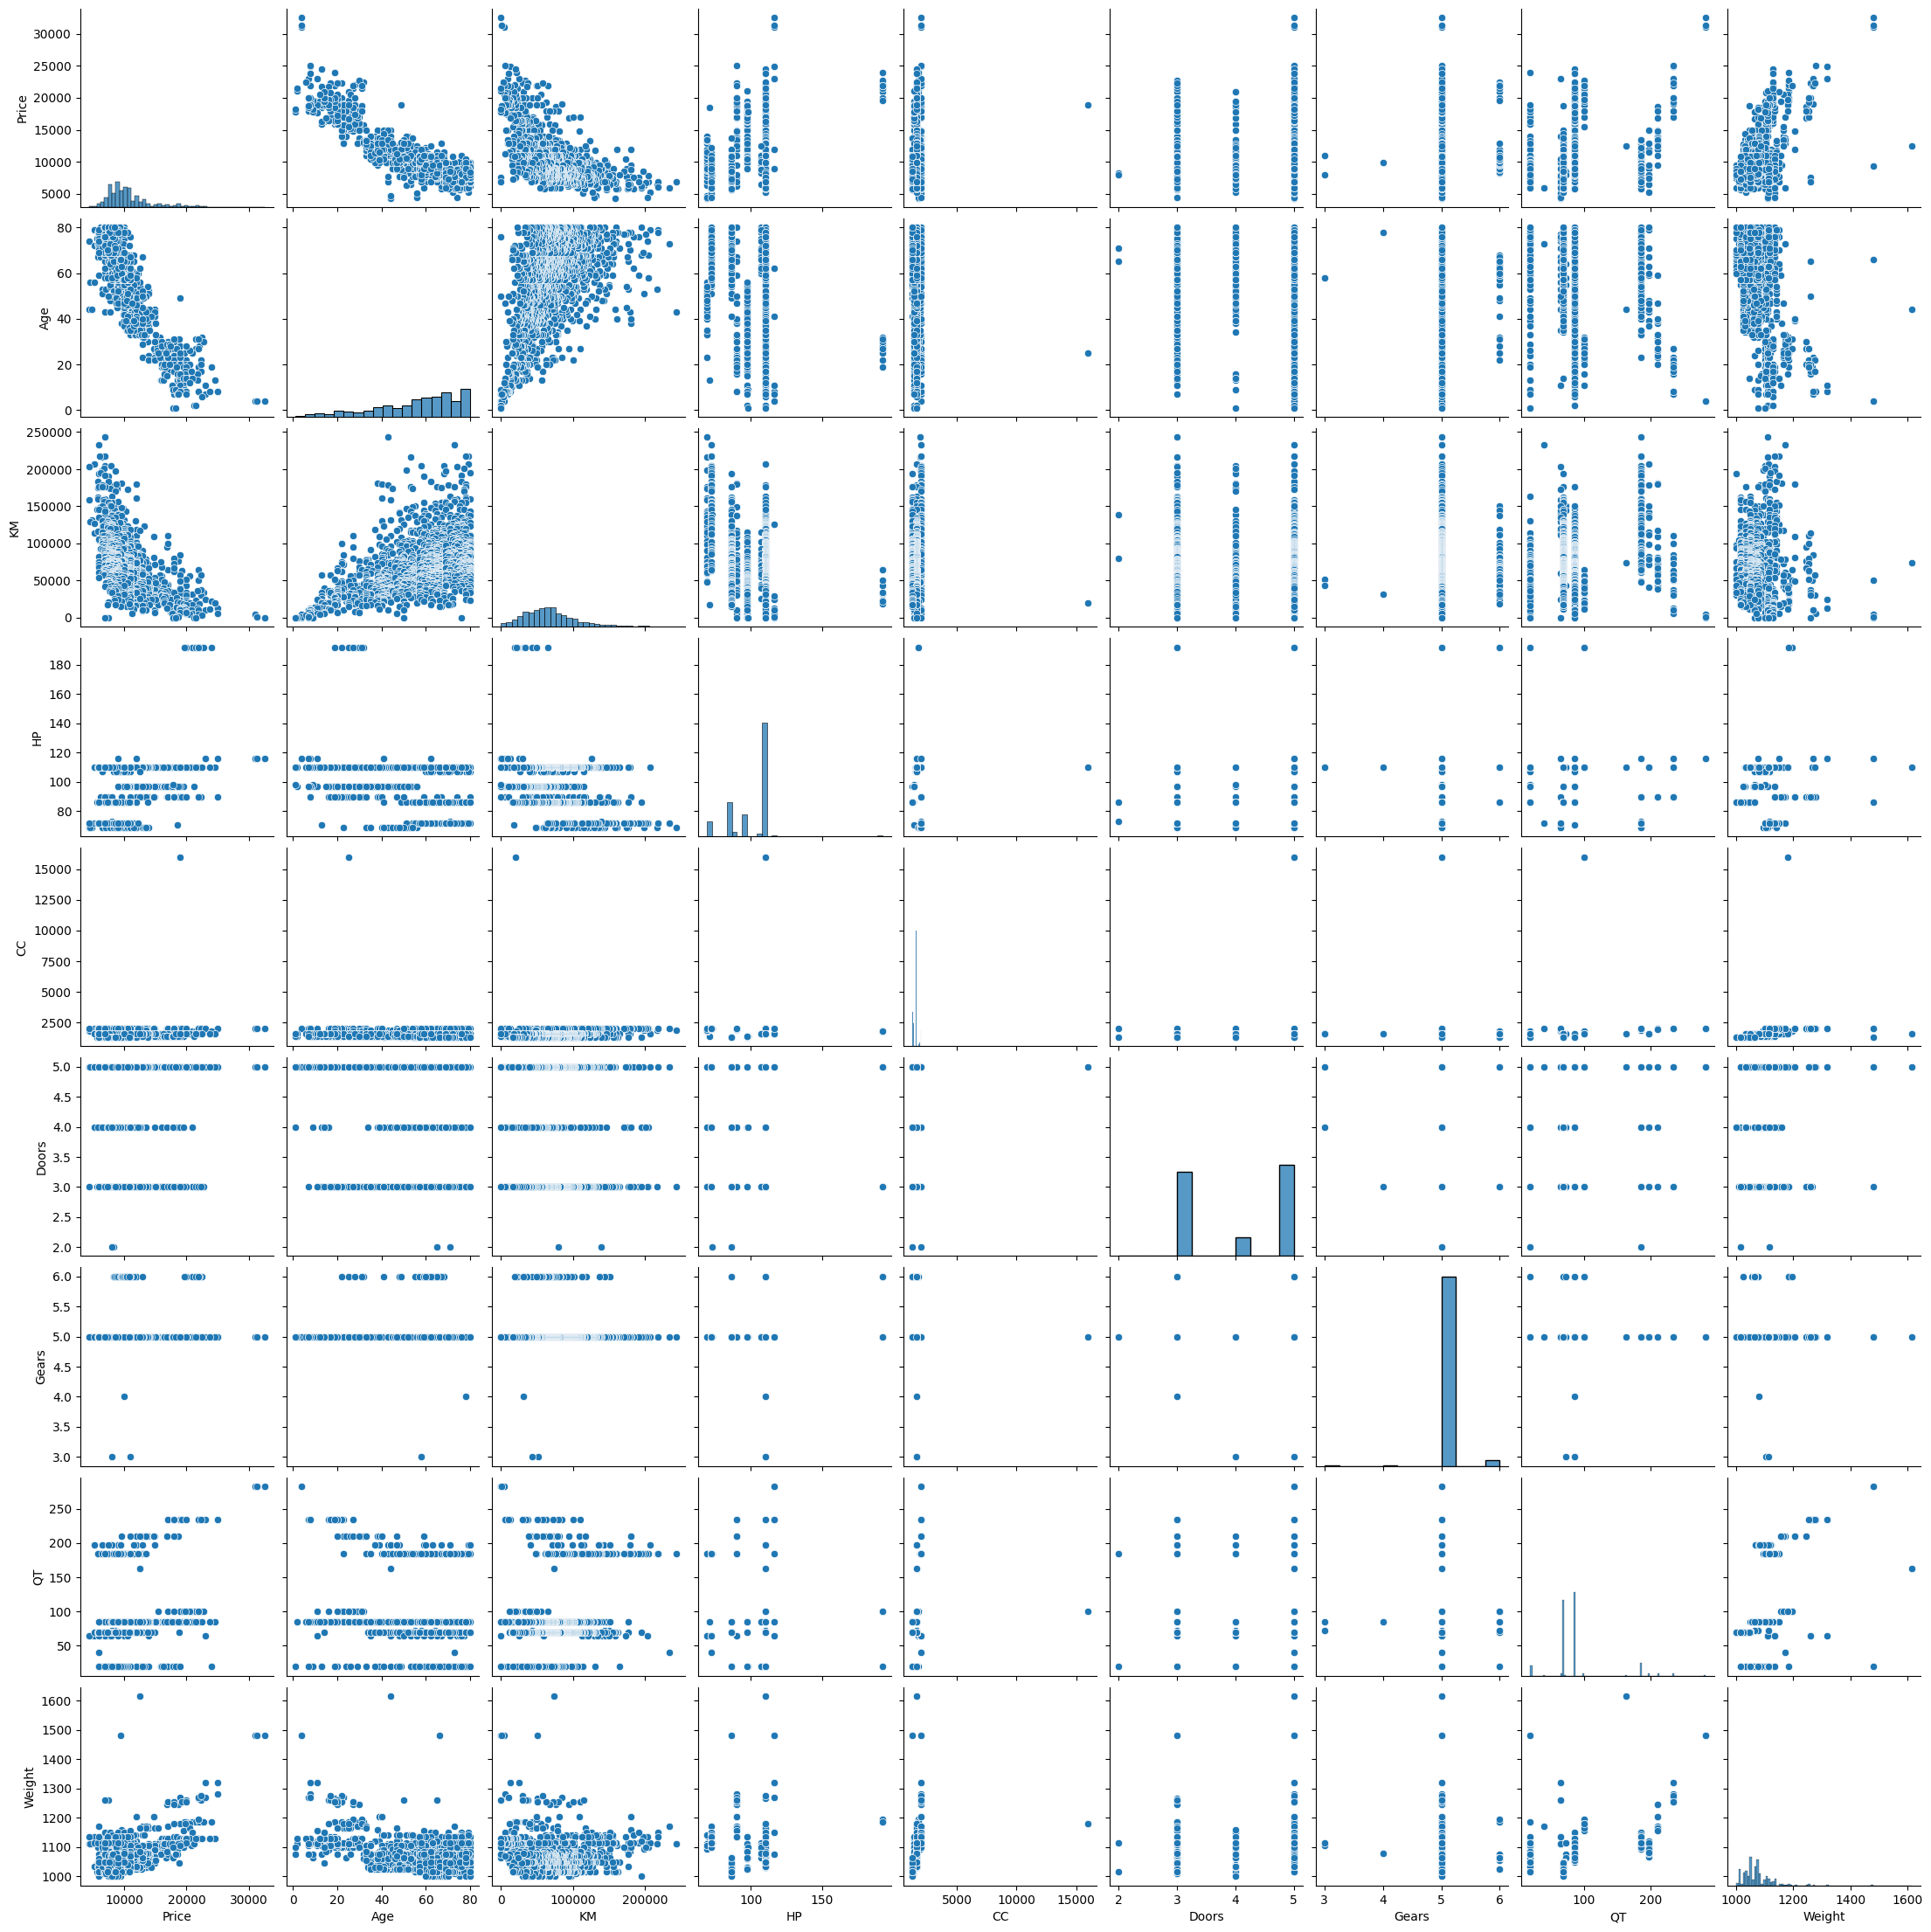

In [134]:
#Multicollinearity analysis
sns.pairplot(cars3)
plt.show()

MODEL TRAINING
--------
OLS MODEL instead of LinearRegression

In [135]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=cars3).fit()

In [136]:
model

MODEL ANALYSIS
-------
- INTERCEPT
- SLOPES/BETA
- TEST STATISTIC
- P-VALUE

In [137]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [138]:
#STATISTICAL ANLYSIS OF MODEL
model.tvalues

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64

In [139]:
np.round(model.pvalues,7)

Intercept    0.000111
Age          0.000000
KM           0.000000
HP           0.000000
CC           0.188239
Doors        0.981644
Gears        0.002452
QT           0.003290
Weight       0.000000
dtype: float64

In [140]:
#COFF OF DETERMINATION - FITNESS TEST
model.rsquared_adj

0.8617487495415147

MODEL ANALYSIS CONCLUSION
- rsq = 0.8617
- MODEL accuracy = 86.17%
- STATISTICALLY INSIGNIFICANT = DOORS ,CC feature

INSINGNIFICANT FEATURES ANALYSIS
- CC
- DOORS

In [141]:
#SIMPLE LINNEAR REG for CC
modelCC=smf.ols('Price~CC',data=cars3).fit()
np.round(modelCC.pvalues,7)

Intercept    0.000000
CC           0.000002
dtype: float64

In [142]:
#SIMPLE LINNEAR REG for DOORS
modeldoors=smf.ols('Price~Doors',data=cars3).fit()
modeldoors.pvalues

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64

In [143]:
#MULITPLE LINEAR REGRESSION
modelCCdoors=smf.ols('Price~CC+Doors',data=cars3).fit()
modelCCdoors.pvalues

Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64

Aa SLR and MLR for insignificant features CC,DOORS is significant with p<0.05

MODEL EVALUATION/VALIDATION
------
- Residual Analysis via RESIDUAL PLOT
- Collinearity Analysis
- Normality of residuals
- Outlier Analysis

In [144]:
# VIF = VARIANCE INFLUENCE FACTOR = 1/(1-rsqr)
# ANLAYSIS OF COLLINEARITY BETWEEN INDEPENDENT VARIABLES
ind_vars="Age+KM+HP+CC+Doors+Gears+QT+Weight"

In [145]:
#CALCUALTING VIF

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=cars3).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=cars3).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=cars3).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=cars3).fit().rsquared
vif_WT=1/(1-rsq_WT)

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=cars3).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=cars3).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=cars3).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=cars3).fit().rsquared
vif_CC=1/(1-rsq_CC)

# Putting the values into Dataframe
df1={'Feature':['Gears','QT','Weight','Age','KM','HP','CC','Doors'],
    'VIFscore':[vif_GR,vif_QT,vif_WT,vif_age,vif_KM,vif_HP,vif_CC,vif_DR]}
Vif_df=pd.DataFrame(df1)
Vif_df

,Feature,VIF
0,Gears,1.098843
1,QT,2.295375
2,Weight,2.487180
3,Age,1.876236
4,KM,1.757178
5,HP,1.419180
6,CC,1.163470
7,Doors,1.155890


VIF < 2.5

No Collinearity

In [146]:
#RESIDUAL ANALYSIS

RESIDUAL ANALSIS

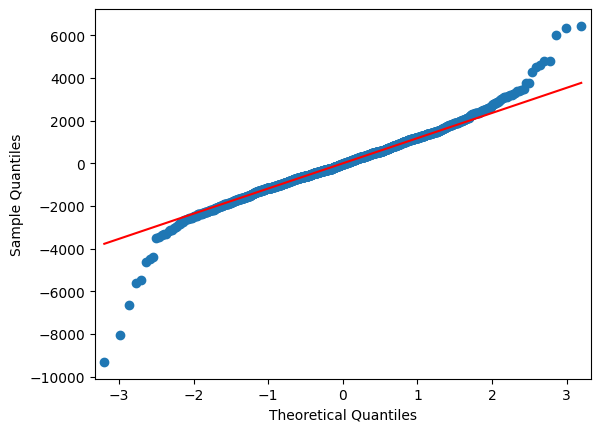

In [147]:
#NORMALITY OF RESIDUAL TEST
sm.qqplot(model.resid,line='q')
plt.show()

In [148]:
#RESIDUAL FOLLOWES NORMALITY
#TEST FOR HOMOSCEDASTICITY

In [149]:
#STANDARDIZED FORMULA
def z(a):
  zscore = (a-a.mean())/a.std()
  return zscore

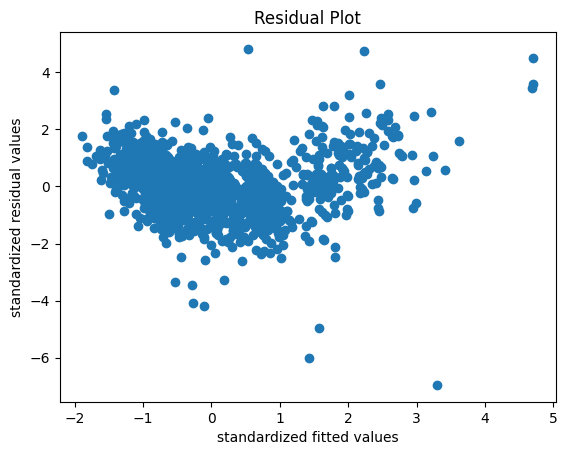

In [150]:
# RESIDUAL PLOT 1  - PREDICTED VS RESIDUAL
plt.scatter(z(model.fittedvalues),z(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

eval_env: 1


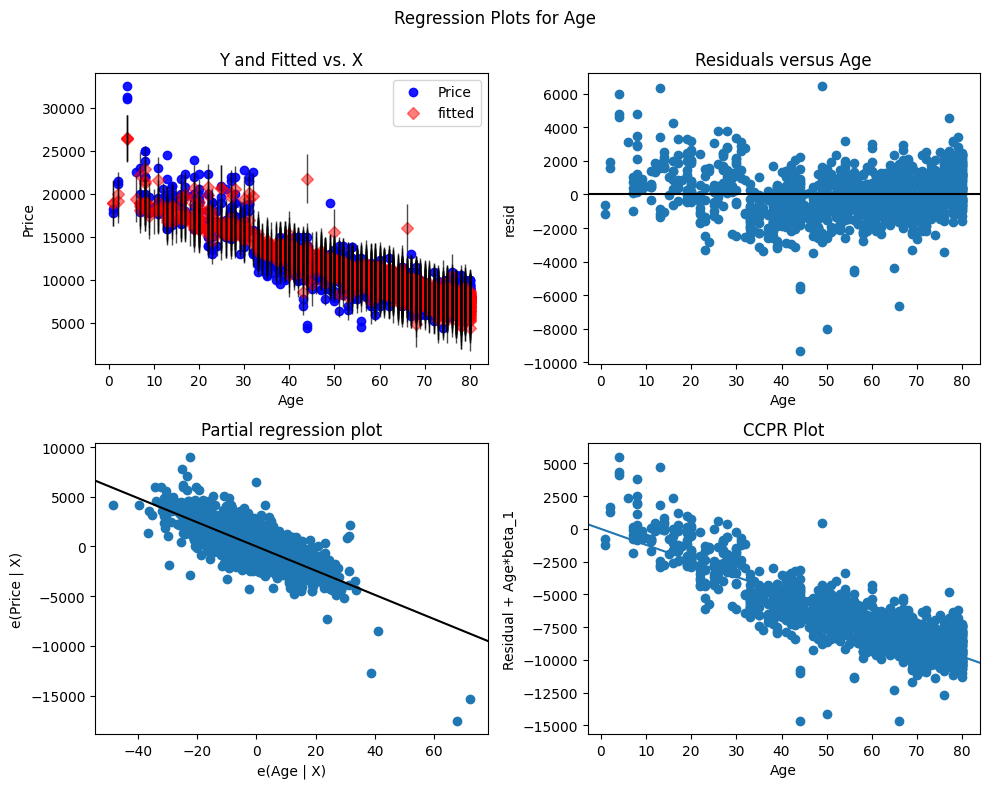

In [151]:
#RESIDUAL PLOT 2 - AGE VS RESIDUAL
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


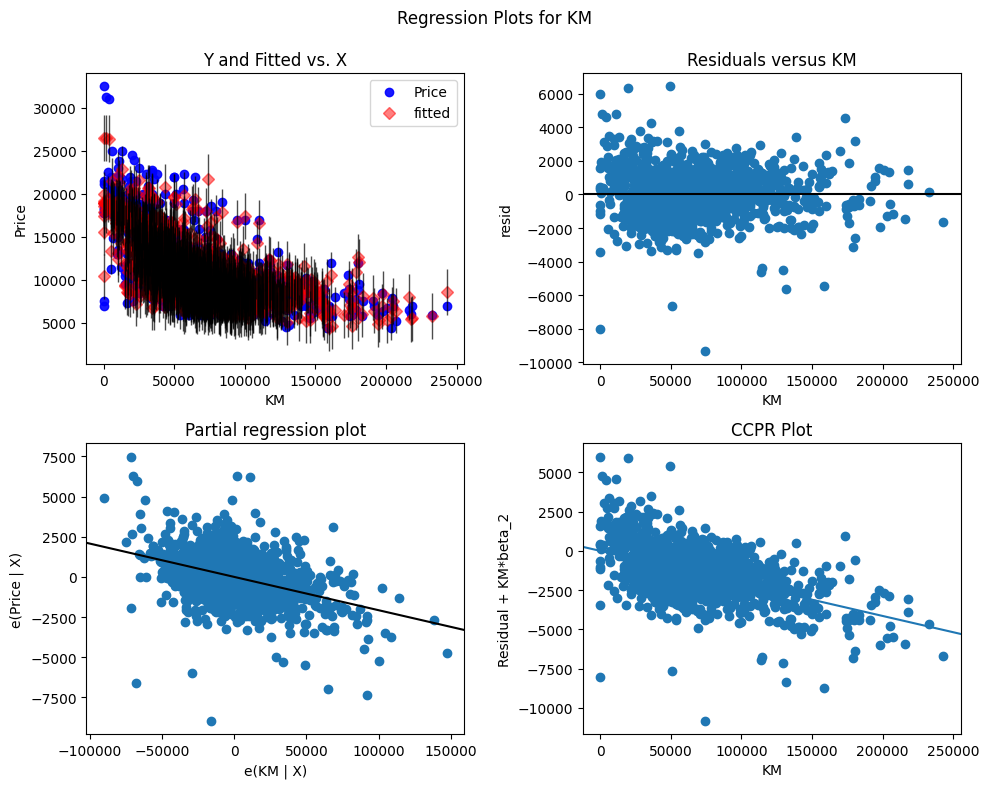

In [152]:
#RESIDUAL PLOT 3 - KM VS RESIDUAL
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


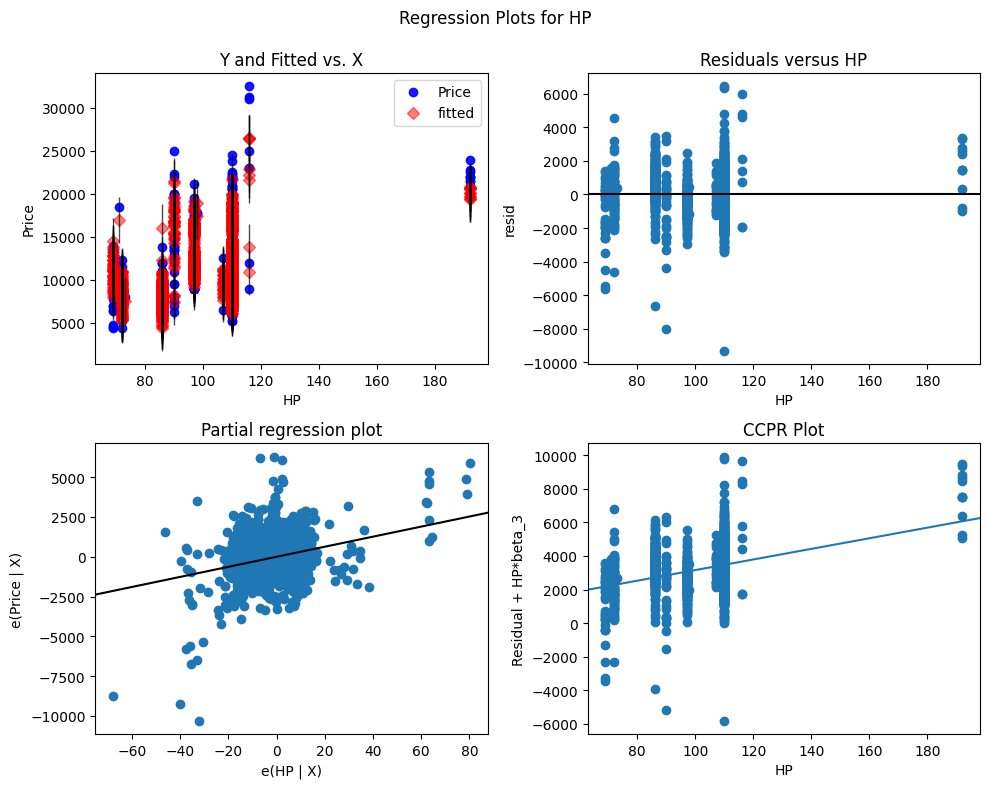

In [153]:
#RESIDUAL PLOT 2 - HP VS RESIDUAL
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


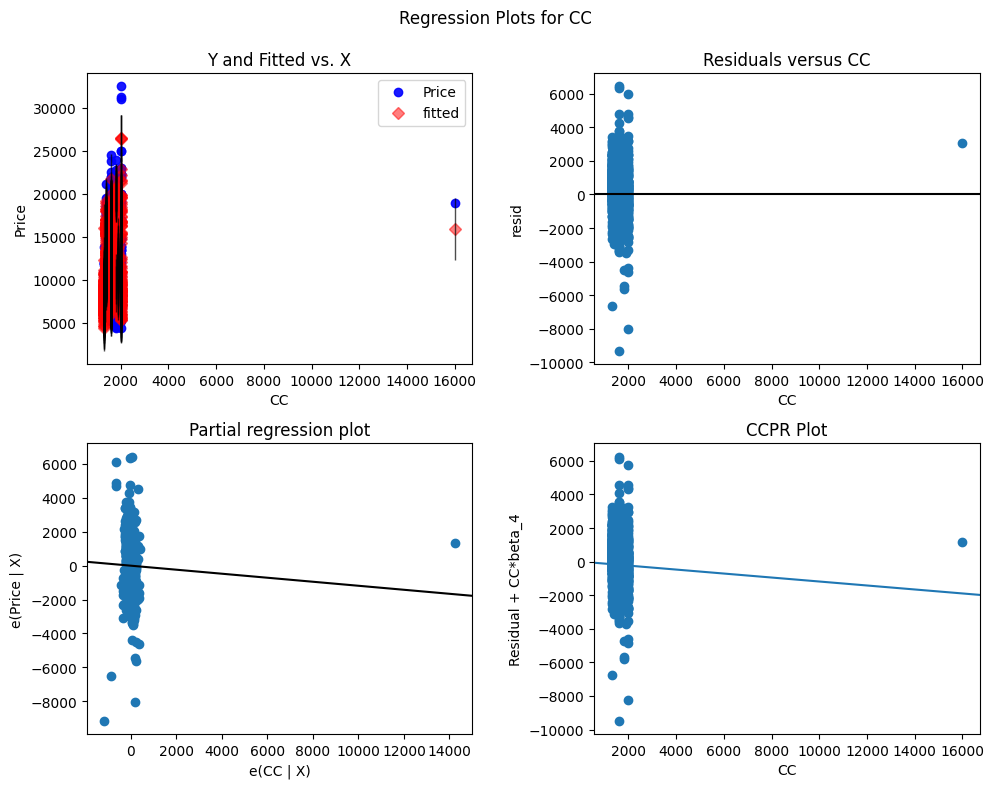

In [154]:
#RESIDUAL PLOT 5 - CC VS RESIDUAL
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


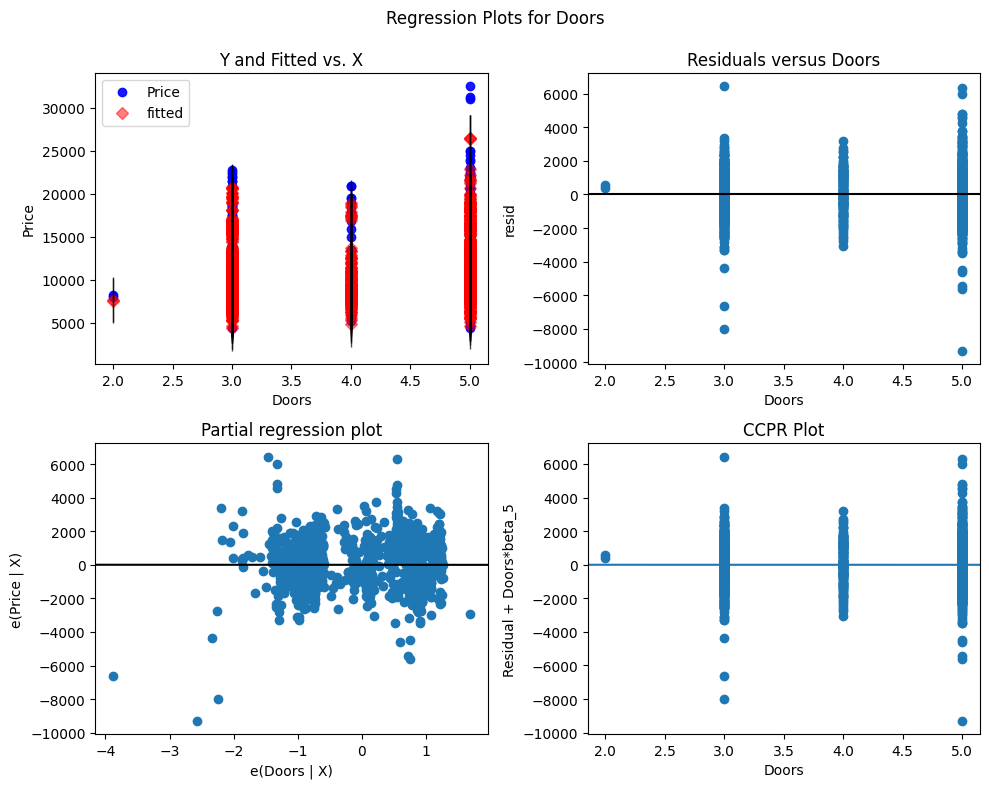

In [155]:
#RESIDUAL PLOT 6 - DOORS VS RESIDUAL
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


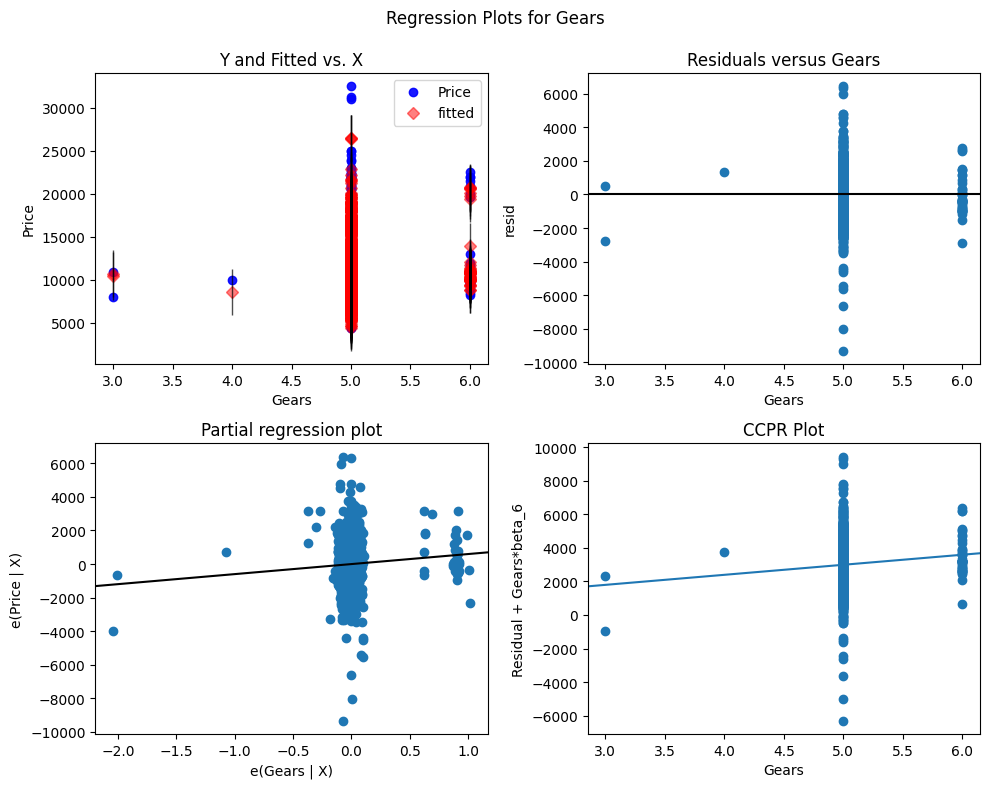

In [156]:
#RESIDUAL PLOT 7 - gears VS RESIDUAL
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


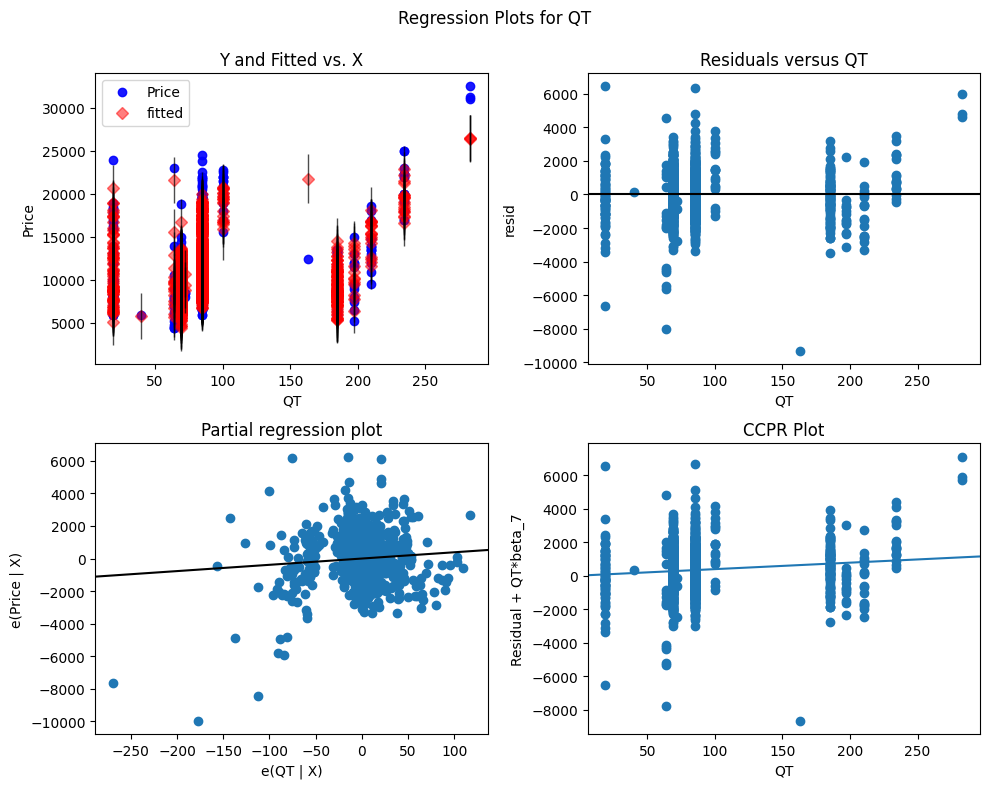

In [157]:
#RESIDUAL PLOT 8 - qt VS RESIDUAL
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


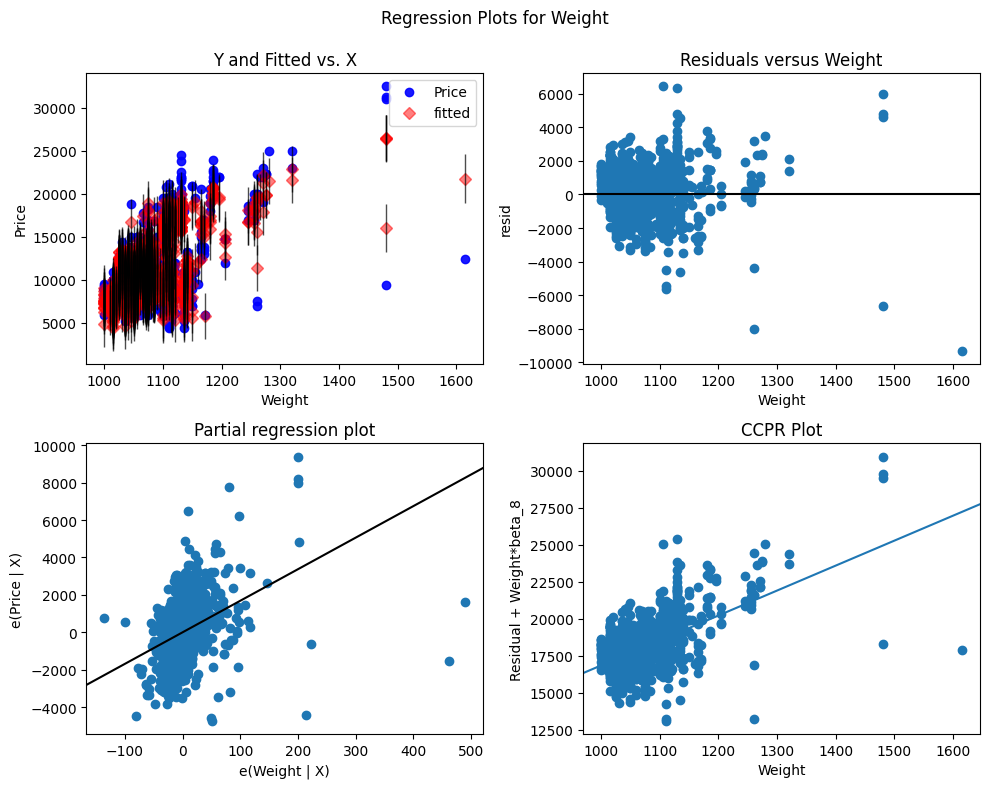

In [158]:
#RESIDUAL PLOT 9 - Weight VS RESIDUAL
fig=plt.figure(figsize=(10,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

OUTLIER ANALYSIS

- INFLUENTIAL POINT
- LEVERAGE POINT
- COOK DISTANCE

In [159]:
#COOK DISTANCE - ROW / DATA POINT HAVING MAX INFLUENCE
cdis=(model.get_influence().cooks_distance)[0]
cdis

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

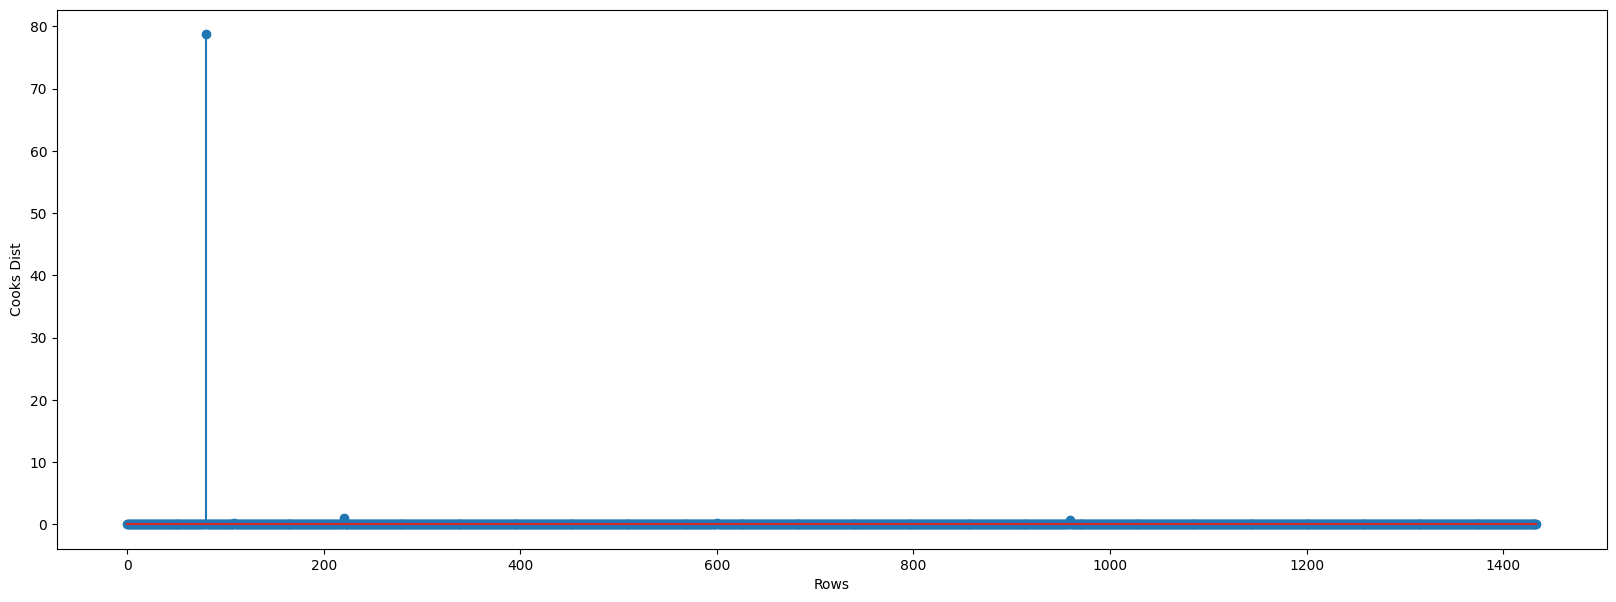

In [160]:
#PLOTING COOK DISTANCE VS ROW
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(cars3)),np.round(cdis,4))
plt.xlabel('Rows')
plt.ylabel('Cooks Dist')
plt.show()

In [161]:
#max cook distance row INDEX
#argmax - returns index value
np.argmax(cdis)

80

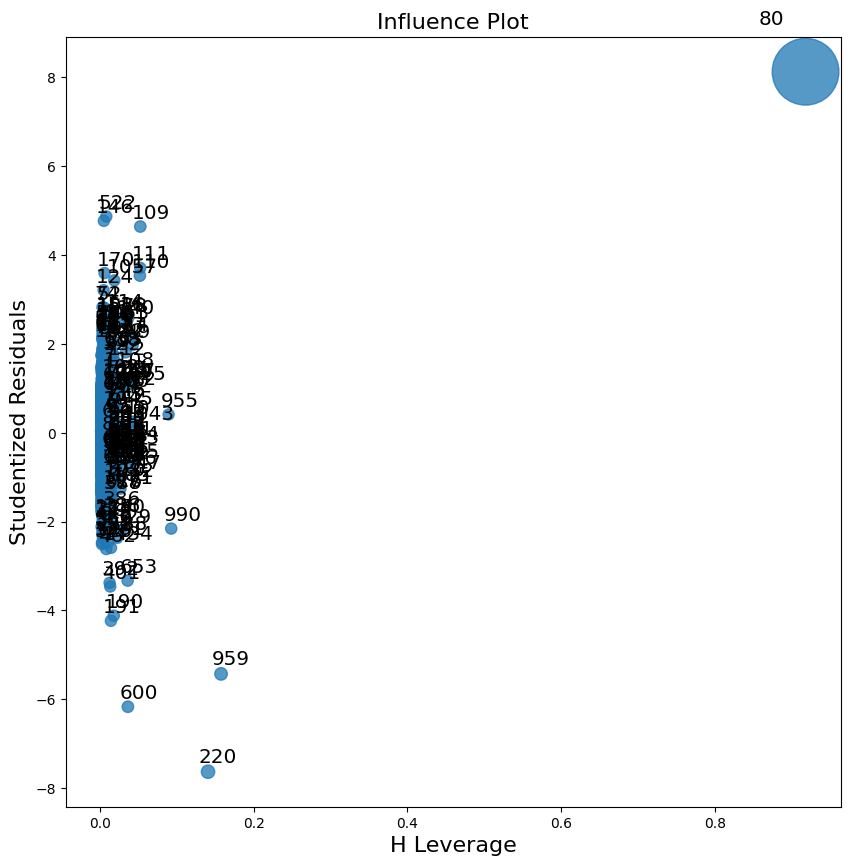

In [162]:
# ROW 80 HAVE MAX INFLUENCE
# LEVERAGE DISTANCE
#influence_plot(model)
fig,axs=plt.subplots(figsize=(10,10))
fig=influence_plot(model,ax= axs)


In [163]:
# Leverage Cuttoff Value = 3*(features+1)/observations
k=cars3.shape[1]
n=cars3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

MODEL Evaluation Conslusion:

- row at index 80 have max influence
- delete and model tuning


MODEL DIAGNOSTICS
----
- OUTLIER DIGNOS
- FINAL MODEL

In [164]:
cars4=cars3.drop(cars3.index[[80]],axis=0).reset_index(drop=True)

In [165]:
cars4.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [166]:
#NEW MODEL
model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=cars4).fit()

In [167]:
rx=['MODEL','MODEL AFTER TUNING']
ry=[np.round(model.rsquared,4),np.round(model1.rsquared,4)]

<BarContainer object of 2 artists>

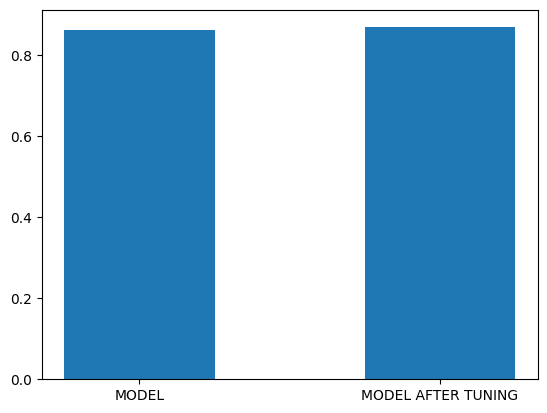

In [168]:
plt.bar(rx,ry,width=.5)

In [174]:
#ACCRUACY IMPROVDE
print('ACCURACY IMPROOVED = ',(np.round(model1.rsquared,4)-np.round(model.rsquared,4)))

ACCURACY IMPROOVED =  0.005599999999999938


FINAL MODEL

- OUTLIER DELETED
- NO MULTICOLINEAR FEATURES
- COFF OF DETERMINATION > 85% GOOD FIT


In [176]:
final_model=model1

MODEL PREDICTIONS
----


In [189]:
#SET 1
set1=pd.DataFrame({'Age':15,"KM":30000,"HP":90,"CC":1200,"Doors":3,"Gears":4,"QT":50,"Weight":999},index=[0])
final_model.predict(set1)

0    14498.833965
dtype: float64

In [190]:
#SET 2
#actual vs predicted
set2=pd.DataFrame()
set2['ACTUAL']=cars4['Price']
set2['PREDCITION']=final_model.predict(cars4[1:])

In [191]:
set2.head()

,ACTUAL,PREDCITION
0,13500,NaN
1,13750,16051.656226
2,13950,16486.949796
3,14950,16133.995128
4,13750,15921.372341
